<a href="https://colab.research.google.com/github/uzeziogho/MLDM/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install apyori
!pip install xlrd
!pip install utils
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5973 sha256=8edd44b770e8c55f49191c92d710a59789504fc198352ba9dce58b978c877f58
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
#import libraries
import matplotlib.pyplot as plt
import pandas as pd
import re
import seaborn as sns
from wordcloud import WordCloud
import nltk
import pandas as pd
nltk.download(['stopwords','punkt','wordnet','omw-1.4','vader_lexicon'])
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [16]:
# test tokenizer
simple_text="This coursework is taking a whole load of time!"

In [6]:
tokenizer=nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+')
tokenized_document=tokenizer.tokenize(simple_text)
print(tokenized_document)

NameError: ignored

In [20]:
stop_words=nltk.corpus.stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [7]:
tReviews=pd.read_csv('/content/tourist_accommodation_reviews.csv',encoding='cp1252')
tReviews.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review
0,rn579778340,Reviewed 1 week ago,Kathu,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...
1,rn576350875,Reviewed 3 weeks ago,Kathu,Thong Dee The Kathu Brasserie,"Quietly set off the main road, nice atmosphere..."
2,rn574921678,Reviewed 4 weeks ago,Kathu,Thong Dee The Kathu Brasserie,I made a reservation for a birthday two days i...
3,rn572905503,"Reviewed April 12, 2018",Kathu,Thong Dee The Kathu Brasserie,We visit here regularly and never fail to be i...
4,rn572364712,"Reviewed April 10, 2018",Kathu,Thong Dee The Kathu Brasserie,Visited this wonderful place on my travels and...


In [8]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment= SentimentIntensityAnalyzer()

print(sentiment.polarity_scores('This move is great!'))
print(sentiment.polarity_scores('This move is not great'))

{'neg': 0.0, 'neu': 0.406, 'pos': 0.594, 'compound': 0.6588}
{'neg': 0.452, 'neu': 0.548, 'pos': 0.0, 'compound': -0.5096}


In [31]:
tReviews.describe()

,ID,Review Date,Location,Hotel/Restaurant name,Review
count,53644,53644,53644,53644,53644
unique,49944,2344,25,537,49938
top,rn564592095,Reviewed 1 week ago,Patong,Da Mario,I have been to this restaurant several times f...
freq,10,616,16403,279,10


In [ ]:
review=tReviews.Review
review

In [11]:
tReviews['compound'] = tReviews['Review'].apply(lambda x:sentiment.polarity_scores(x)['compound'])
tReviews['neg'] = tReviews['Review'].apply(lambda x:sentiment.polarity_scores(x)['neg'])
tReviews['neu'] = tReviews['Review'].apply(lambda x:sentiment.polarity_scores(x)['neu'])
tReviews['pos'] = tReviews['Review'].apply(lambda x:sentiment.polarity_scores(x)['pos'])

In [12]:
#tReviews['compound']=[sentiment.polarity_scores(review)['compound']for review in tReviews['tReviews.text']]
#tReviews['neg']=[sentiment.polarity_scores(review)['neg']for review in tReviews['tReviews.text']]
#tReviews['neu']=[sentiment.polarity_scores(review)['neu']for review in tReviews['tReviews.text']]
#tReviews['pos']=[sentiment.polarity_scores(review)['pos']for review in tReviews['tReviews.text']]

In [13]:
tReviews[['compound','neg','neu','pos']].describe()

,compound,neg,neu,pos
count,53644.000000,53644.000000,53644.000000,53644.000000
mean,0.659430,0.026920,0.737564,0.235519
std,0.423819,0.051134,0.127370,0.136031
min,-0.975700,0.000000,0.217000,0.000000
25%,0.585900,0.000000,0.654000,0.133000
50%,0.844200,0.000000,0.744000,0.228000
75%,0.927100,0.042000,0.830000,0.327000
max,0.993200,0.635000,1.000000,0.783000


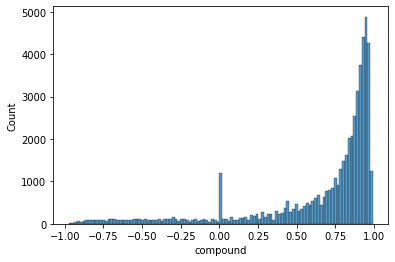

In [14]:
sns.histplot(tReviews['compound'])

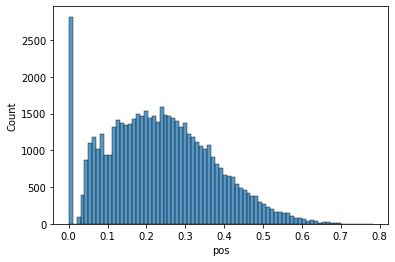

In [15]:
sns.histplot(tReviews['pos'])

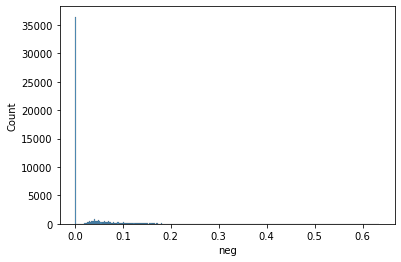

In [16]:
sns.histplot(tReviews['neg'])

In [17]:
#Lets look at how many negative reviews we have per product
(tReviews['compound']<=0).groupby(tReviews['Hotel/Restaurant name']).sum()

Hotel/Restaurant name
+39 Italian Street Food             16
2gether Restaurant                  12
3 Spices Restaurant                  6
360 ° Bar                            5
44 Thaikitchen "KATA FOOD COURT"     4
                                    ..
Ying Restaurant                      6
Yo Green Restaurant                 11
Yorkshire Hotel Restaurant          12
You and Me Patong                   10
i-Kroon Cafe                         5
Name: compound, Length: 537, dtype: int64

In [ ]:
#Calculate as percentage of total reviews

percent_negative=pd.Dataframe((tReviews['compound']<=0).groupby(tReviews['Hotel/Restaurant name']).sum()
                              /tReviews['name'].groupby(tReviews['name']).count()*100,columns=['%negative reviews']).sort_values(by='negative reviews')